In [1]:
### python 3.5 version
### virtualEnv_name is helloTF

import tensorflow as tf
tf.__version__

'1.6.0'

In [2]:
# Create a constant op
# This op is added as a node to the default graph
hello = tf.constant("Hello, TensorFlow!")

# seart a TF session
sess = tf.Session()

# run the op and get result
print(sess.run(hello))

b'Hello, TensorFlow!'


In [3]:
## 더하기 예제
# Build graph (tensor) using TensorFlow operations
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly
node3 = tf.add(node1, node2)

In [4]:
print("node1: {} node2: {}".format(node1,node2))
print("node3: {}".format(node3))

node1: Tensor("Const_1:0", shape=(), dtype=float32) node2: Tensor("Const_2:0", shape=(), dtype=float32)
node3: Tensor("Add:0", shape=(), dtype=float32)


In [5]:
# feed data and run graph (operation) sess.run(op)
sess = tf.Session() 
print("sess.run(node1, node2): ".format(sess.run([node1, node2])))
print("sess.run(node3): ", sess.run(node3))

sess.run(node1, node2): 
sess.run(node3):  7.0


In [6]:
# placeholder(상수가 아닌 변수를 만들어줌)
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b # + provides a shortcut for tf.add(a,b)

print(sess.run(adder_node, feed_dict={a: 3, b:4.5}))
print(sess.run(adder_node, feed_dict={a:[1,3], b:[2,4]}))

7.5
[3. 7.]


In [7]:
### Lab2
### Linear Regression

## 1. Build graph using TF operations
# X and Y data
x_train = [1, 2, 3]
y_train = [1, 2, 3]

# tf.Variable의 의미는 tesnsorflow가 사용하는 변수라는 의미 or trainable variable
w = tf.Variable(tf.random_normal([1]), name='weight') # 1차원 array에 대한 랜덤값을 넣어줌
b = tf.Variable(tf.random_normal([1]), name='bias')
# Our hypothesis Xw+b
hypothesis = x_train * w + b

In [8]:
# cost/loss funtion
cost = tf.reduce_mean(tf.square(hypothesis - y_train)) # 평균을 내줌

In [9]:
# Minimize(GradientDescent)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

In [10]:
## 2. Run/update graph and get results
# Launch the graph in a session
sess = tf.Session()
# Initializes global variables in the graph - 사용하기 전에 변수 초기화가 필요함.
sess.run(tf.global_variables_initializer())

# Fit the line
for step in range(2001):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(cost), sess.run(w), sess.run(b))

0 1.564537 [0.2715283] [0.3565996]
20 0.05569449 [0.71657777] [0.5205586]
40 0.038204353 [0.76901495] [0.5133021]
60 0.034585577 [0.7835952] [0.49081728]
80 0.031410143 [0.7941201] [0.46790662]
100 0.028527208 [0.80382943] [0.4459316]
120 0.02590886 [0.81305194] [0.42497584]
140 0.02353082 [0.82183814] [0.40500367]
160 0.02137109 [0.8302111] [0.38596997]
180 0.019409569 [0.83819056] [0.36783084]
200 0.017628083 [0.8457949] [0.3505442]
220 0.016010119 [0.853042] [0.33406997]
240 0.0145406565 [0.8599485] [0.31836993]
260 0.013206038 [0.8665304] [0.30340767]
280 0.011993922 [0.87280303] [0.28914857]
300 0.010893094 [0.8787808] [0.2755597]
320 0.009893266 [0.8844777] [0.2626094]
340 0.008985223 [0.8899068] [0.25026768]
360 0.008160518 [0.8950808] [0.238506]
380 0.0074115214 [0.9000116] [0.22729711]
400 0.006731266 [0.90471065] [0.21661498]
420 0.0061134393 [0.9091889] [0.20643494]
440 0.0055523277 [0.91345674] [0.19673325]
460 0.005042707 [0.9175239] [0.1874875]
480 0.0045798705 [0.9214] [

In [11]:
# Now we can use x and y in place of x_data and y_data
# # placeholders for a tensor that will be always fed using feed_dict
# See http://stackoverflow.com/questions/336693740/
w = tf.Variable(tf.random_normal([1]), name='weight') # 1차원 array에 대한 랜덤값을 넣어줌
b = tf.Variable(tf.random_normal([1]), name='bias')
x = tf.placeholder(tf.float32, shape=[None])
y = tf.placeholder(tf.float32, shape=[None])

# Our hypothesis xw+b
hypothesis = x * w + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y)) # 평균을 내줌

# minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# launch the graph in a session
sess = tf.Session()
# initializes global variables in the graph
sess.run(tf.global_variables_initializer())

# fit the line with new training data
for step in range(2001):
    cost_val, w_val, b_val, _ = sess.run([cost, w , b, train],
                                        feed_dict={x: [1,2,3,4,5], y:[2.1,3.1,4.1,5.1,6.1]}) # _ 변수는 필요없다는 의미
    if step % 20 == 0:
        print(step, cost_val, w_val, b_val)
        
# Testing our model
print("테스트 결과는 ",sess.run(hypothesis, feed_dict={x:[5]}))
print("테스트 결과는 ",sess.run(hypothesis, feed_dict={x:[2.5]}))
print("테스트 결과는 ",sess.run(hypothesis, feed_dict={x:[1.5, 3.5]}))

0 46.906 [-0.8183826] [1.9892571]
20 0.26878667 [0.65854657] [2.3071198]
40 0.23390321 [0.6870416] [2.2297633]
60 0.20426941 [0.7075652] [2.1557817]
80 0.17839006 [0.7267171] [2.086638]
100 0.1557894 [0.74461454] [2.0220225]
120 0.13605201 [0.76133996] [1.9616383]
140 0.11881522 [0.77697] [1.9052091]
160 0.10376225 [0.7915764] [1.8524753]
180 0.090616375 [0.80522615] [1.8031954]
200 0.07913603 [0.817982] [1.7571425]
220 0.06911 [0.8299025] [1.7141056]
240 0.06035433 [0.84104234] [1.6738874]
260 0.05270789 [0.8514526] [1.6363032]
280 0.046030164 [0.86118114] [1.6011803]
300 0.040198527 [0.87027246] [1.5683576]
320 0.035105694 [0.87876844] [1.5376844]
340 0.030658048 [0.8867079] [1.50902]
360 0.026773904 [0.89412755] [1.4822332]
380 0.023381796 [0.9010612] [1.4572002]
400 0.020419553 [0.90754074] [1.4338071]
420 0.017832553 [0.913596] [1.4119459]
440 0.015573293 [0.91925466] [1.3915162]
460 0.013600254 [0.92454284] [1.3724242]
480 0.011877182 [0.92948455] [1.354583]
500 0.0103724655 [0.9

In [12]:
### lab3
## 경사하강법이 잘 적용되는지 확인
import matplotlib.pyplot as plt

x=[1,2,3]
y=[1,2,3]

w = tf.placeholder(tf.float32)
# Our hypothesis f or linear model X*W
hypothesis = x*w

In [13]:
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis-y))

In [14]:
# Launch the graph in a session.
sess = tf.Session()
# Initializess global variables in the graph.
sess.run(tf.global_variables_initializer())

In [16]:
# Variables for plotting cost function
w_val = []
cost_val = []
for i in range(-30, 50):
    feed_w = i * 0.1
    curr_cost, curr_w = sess.run([cost, w], feed_dict={w: feed_w})
    w_val.append(curr_w)
    cost_val.append(curr_cost)

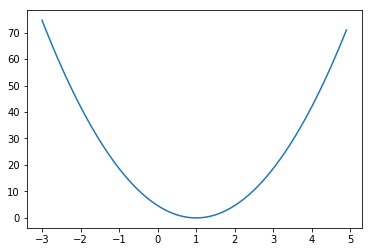

In [18]:
# Show the cost function
plt.plot(w_val, cost_val)
plt.show()

In [19]:
## 최소화 모델
x_data = [1,2,3]
y_data = [1,2,3]

w = tf.Variable(tf.random_normal([1]), name='weight')
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

In [20]:
# Our hypothesis for linear model X*W
hypothesis = x*w
# cost/loss function
cost = tf.reduce_sum(tf.square(hypothesis - y))

In [21]:
# Minimize : Gradient Descent using derivative: W -= learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((w*x - y) * x)
descent = w - learning_rate * gradient
update = w.assign(descent)

In [22]:
# Launch the graph in a session
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())
for step in range(21):
    sess.run(update, feed_dict={x:x_data, y:y_data})
    print(step, sess.run(cost, feed_dict={x:x_data, y:y_data}), sess.run(w))

0 1.0782166 [1.2775166]
1 0.30669257 [1.1480088]
2 0.087236926 [1.078938]
3 0.024814075 [1.0421003]
4 0.0070582647 [1.0224535]
5 0.002007657 [1.0119752]
6 0.0005710693 [1.0063868]
7 0.00016243901 [1.0034063]
8 4.6200745e-05 [1.0018166]
9 1.3143639e-05 [1.0009689]
10 3.7383804e-06 [1.0005168]
11 1.0634667e-06 [1.0002756]
12 3.0256962e-07 [1.000147]
13 8.613904e-08 [1.0000784]
14 2.4481167e-08 [1.0000418]
15 6.941221e-09 [1.0000223]
16 1.9895197e-09 [1.0000119]
17 5.6338934e-10 [1.0000063]
18 1.5597834e-10 [1.0000033]
19 4.3499426e-11 [1.0000018]
20 1.2732926e-11 [1.000001]
